## Corte axial de un tac 

In [29]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

import numpy as np
import os, sys
import PIL
import PIL.Image

In [30]:
os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "train"

'c:\\Users\\xyang\\OneDrive\\Escritorio\\ARCHIVOS\\THEBRIDGE\\Data-Science-Bootcamp-21\\ENTREGABLES\\00_POYECTO_ML\\data\\train'

In [31]:
batch_size = 32 # Entrena de 32 en 32
img_height = 180
img_width = 180

data_dir = os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "new_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training", 
  seed=235,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation", 
  seed=235,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8280 files belonging to 4 classes.
Using 6624 files for training.
Found 8280 files belonging to 4 classes.
Using 1656 files for validation.


In [32]:
imread(os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "new_train" + os.sep + 
"ModerateDemented" + os.sep + "moderateDem5.jpg").shape

(208, 176)

In [33]:
print("train:", train_ds.class_names)
print(len(train_ds.class_names))
print(val_ds.class_names)
print(len(val_ds.class_names))

for i in val_ds.class_names: 
    if i not in train_ds.class_names:
        print(i)

train: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
4
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
4


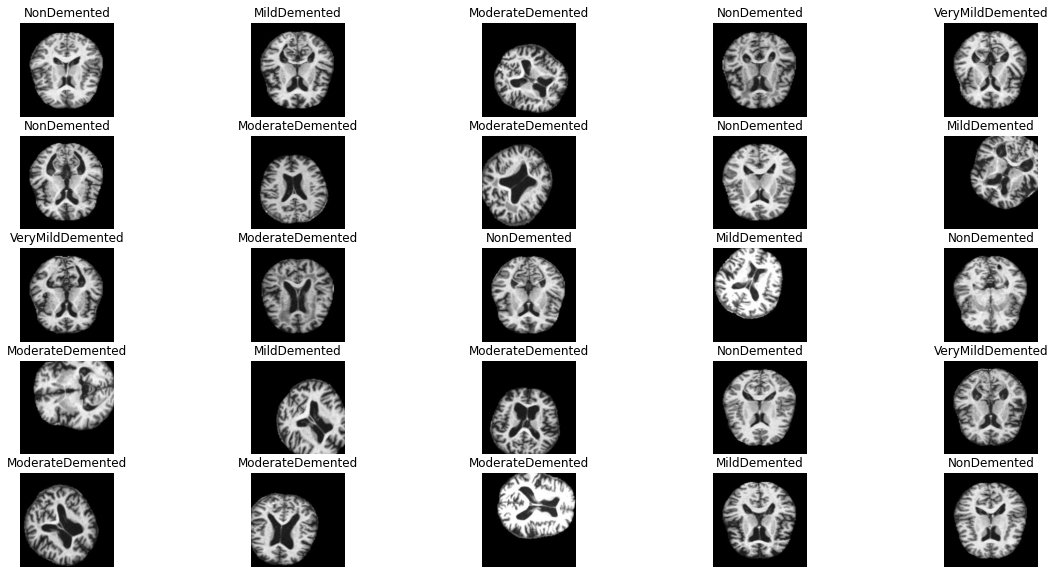

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [7]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [36]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=16,  # nº de neuronas
                        kernel_size=(3, 3), 
                        input_shape=(180, 180, 3), 
                        padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), # Preprocesamiento/Te lo transforma a vector
    keras.layers.Dense(128, activation='relu'), # Una capa con 128 neuronas
    keras.layers.Dense(4, activation="softmax") # Una capa con 4 neuronas porque hay 4 clases
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 90, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16588928  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 16,589,892
Trainable params: 16,589,892
Non-trainable params: 0
__________________________________________

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(train_ds,
                    validation_data = val_ds,
                    callbacks=[early_stop],
                    epochs = 10,
                    verbose=1)

Epoch 1/10
207/207 [==============================] - 53s 256ms/step - loss: 193.3043 - accuracy: 0.3110 - val_loss: 1.3480 - val_accuracy: 0.2929
Epoch 2/10
207/207 [==============================] - 53s 257ms/step - loss: 1.2170 - accuracy: 0.4123 - val_loss: 1.1989 - val_accuracy: 0.4463
Epoch 3/10
207/207 [==============================] - 49s 238ms/step - loss: 1.3354 - accuracy: 0.3374 - val_loss: 1.3576 - val_accuracy: 0.3484
Epoch 4/10
207/207 [==============================] - 50s 239ms/step - loss: 1.2638 - accuracy: 0.4059 - val_loss: 1.0876 - val_accuracy: 0.4469
Epoch 5/10
207/207 [==============================] - 49s 237ms/step - loss: 1.1549 - accuracy: 0.4472 - val_loss: 1.0732 - val_accuracy: 0.4577
Epoch 6/10
207/207 [==============================] - 50s 241ms/step - loss: 1.1602 - accuracy: 0.4443 - val_loss: 1.0428 - val_accuracy: 0.4614
Epoch 7/10
207/207 [==============================] - 50s 241ms/step - loss: 1.1438 - accuracy: 0.4432 - val_loss: 1.0305 - val_

In [48]:
dire = os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "test" + os.sep + "MildDemented"

In [49]:
def read_data(path):
    X = []
    dire = os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "test" + os.sep + "MildDemented"
    for file in os.listdir(path):
        image = cv2.imread(path + '/' + file, flags=cv2.IMREAD_COLOR)
        smallimage = cv2.resize(image, (180, 180))
        
        X.append(smallimage)

    return np.array(X)
    

x_test = read_data(dire)

# Procesar las imagenes tal y como entran en el modelo
x_test = preprocess_input(x_test)
print(x_test.shape)

(179, 180, 180, 3)


In [50]:
preds = model.predict(x_test)
x = np.argmax(preds[10])
x

2

In [51]:
train_ds.class_names[x]

'NonDemented'

In [52]:
x = np.argmax(preds[10])
x

2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

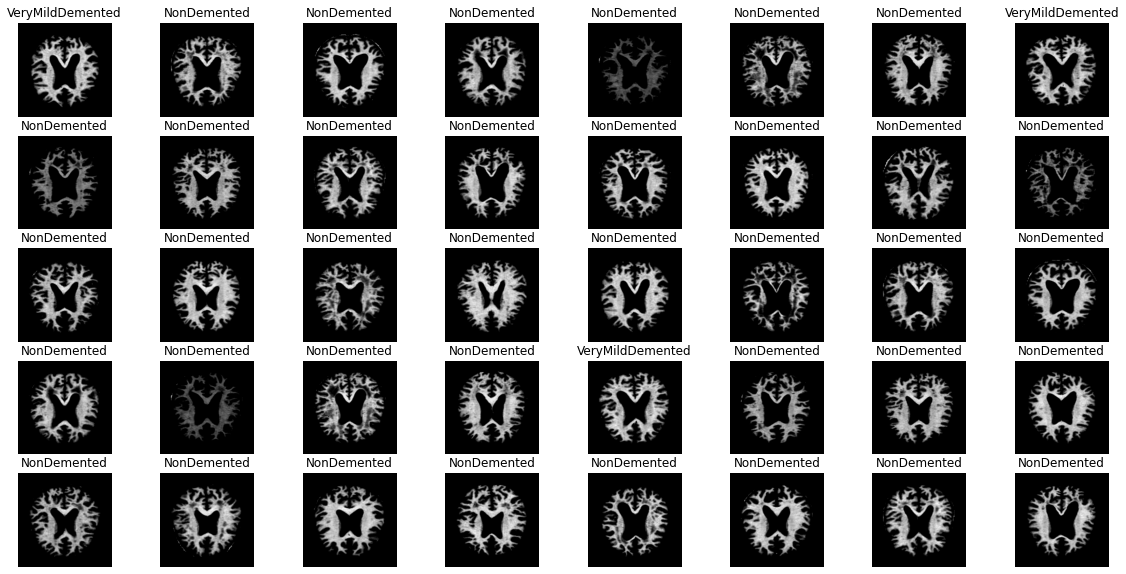

In [56]:
plt.figure(figsize=(20, 10))
for i in range(40):
    ax = plt.subplot(5, 8, i + 1)
    plt.imshow(x_test[i])
    plt.title(train_ds.class_names[np.argmax(preds[i])])
    plt.axis("off")

In [ ]:
dire = os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "test" + os.sep + "ModerateDemented"

In [ ]:
os.listdir(dire)[:6]

['27 (2).jpg', '27.jpg', '28 (2).jpg', '28.jpg', '29 (2).jpg', '29.jpg']

In [ ]:
cv2.imread(dire + os.sep + "27 (2).jpg", flags=cv2.IMREAD_COLOR).shape

(208, 176, 3)

In [ ]:
imread(os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "train" + os.sep + 
"ModerateDemented" + os.sep + "moderateDem0.jpg")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)